In [1]:
library("ggpubr")

Loading required package: ggplot2
Loading required package: magrittr


In [2]:
pair_plot <- function(tmp_df, title_str) {
    p <- ggpaired(tmp_df, x = "group", y = "rank_value",
         color = "group", line.color = "gray", line.size = 0.4,
         palette = "jco", title = title_str) 
    #stat_compare_means(paired = TRUE)
    p
}

visualize_enrichment <- function(up_signature, down_signature, gene_rank_matrix, compound_name, idx_vec) {
    # sample a vector
    pert_vec <- gene_rank_matrix[, 1]
    up_signature <- up_signature[up_signature %in% pert_vec]   
    down_signature <- down_signature[down_signature %in% pert_vec]
    p_list <- list()
    # get the matching results for all the drugs in idx_vec
    for (i in 1:ncol(gene_rank_matrix[,idx_vec])) {
        if (i %% 1000 == 0)  { IRdisplay::display_html(paste0("INFO: ", i, " Instances."))}
        pert_vec <- gene_rank_bing[, i]
        # get the rank
        up_v <- match(up_signature, pert_vec)
        down_v <- match(down_signature, pert_vec)
        #print(length(up_v))
        #print(length(down_v))
        plot_df_up <- data.frame(rank_value = c(1-1:length(up_signature)/length(up_signature),1-(up_v/length(pert_vec))),
                                  group = c(rep("Rank of Disease Signature", length(up_signature)), 
                                            rep("Rank of Drug Signature", length(up_signature))))
        plot_df_down <- data.frame(rank_value = c(1-1:length(down_signature)/length(down_signature),1-(down_v/length(pert_vec))),
                                  group = c(rep("Rank of Disease Signature", length(down_signature)), 
                                            rep("Rank of Drug Signature", length(down_signature))))
        p_list[[i]] <- list() 
        p_list[[i]][["up"]] <- pair_plot(plot_df_up, "Distribution of Up Signature ")
        p_list[[i]][["down"]] <- pair_plot(plot_df_down, "Distribution of Down Signature ")
    }
    #output_list <- list(plot_df_up = plot_df_up, plot_df_down = plot_df_down)
    return(p_list)
}

In [3]:
correlation_score <- function(up_signature, down_signature, rank_matrix, compound_name) {
    n = 1
    connectivity_score_vec <- c()
    gene_rank_bing <- rank_matrix
    for (i in 1:ncol(gene_rank_bing)) {
        if (i %% 500 == 0)  { print(paste0("INFO: ", i, " Instances."))}
        pert_vec <- gene_rank_bing[, i]
        up_signature <- up_signature[up_signature %in% pert_vec]   
        down_signature <- down_signature[down_signature %in% pert_vec]
        
        # get teh rank
        up_v <- match(up_signature, pert_vec)
        down_v <- match(down_signature, pert_vec)
        
        up_score <- cor((1:length(up_v))/length(up_v), up_v/nrow(gene_rank_bing))
        down_score <- cor((1:length(down_v))/length(down_v), down_v/nrow(gene_rank_bing))
        tmp_s <- up_score + down_score
        connectivity_score_vec <- c(connectivity_score_vec, tmp_s)   
    
        
    }
    output_df <- data.frame(compound_name = compound_name, connectivity_score = connectivity_score_vec)
    return(output_df)
    
}



In [11]:
ln <- load("../../exp_res_ks_20191002.RData")
ln

[1] "up_res_cc"         "up_res_pair_ez"    "down_res_cc"      
 [4] "down_res_pair_ez"  "up_signature_df"   "down_signature_df"
 [7] "gene_rank_bing"    "compound_name"     "ks_score_df_cc"   
[10] "ks_score_df_pair"  "ks_score_df"

In [21]:
ncol(gene_rank_bing[,1:3])

[1] 3

In [14]:
output_list <- visualize_enrichment(up_signature_df$entrezgene_id, 
                    down_signature_df$entrezgene_id,
                   gene_rank_bing,
                   compound_name,
                   c(1:5774))

INFO: 1000 Instances.

INFO: 2000 Instances.

INFO: 3000 Instances.

INFO: 4000 Instances.

INFO: 5000 Instances.

In [4]:
source("../code//correlation_connectivity.R")
correlation_score_merged_df <- correlation_score_merged(up_signature_df$entrezgene_id, 
                                                 down_signature_df$entrezgene_id, 
                                                 gene_rank_bing, 
                                                 compound_name)

[1] "INFO: 500 Instances."
[1] "INFO: 1000 Instances."
[1] "INFO: 1500 Instances."
[1] "INFO: 2000 Instances."
[1] "INFO: 2500 Instances."
[1] "INFO: 3000 Instances."
[1] "INFO: 3500 Instances."
[1] "INFO: 4000 Instances."
[1] "INFO: 4500 Instances."
[1] "INFO: 5000 Instances."
[1] "INFO: 5500 Instances."


In [5]:
head(correlation_score_merged_df)

compound_name    connectivity_score
1 rutin             0.03910984       
2 tyrphostin-AG-82  0.07585924       
3 AG-957           -0.08645286       
4 alaproclate      -0.01000406       
5 albendazole      -0.21212860       
6 alclometasone     0.04958601

In [7]:
head(correlation_score_merged_df[order(correlation_score_merged_df$connectivity_score, decreasing = T),])

compound_name            connectivity_score
4380 BRD-K02269790            0.4148901         
5482 avrainvillamide-analog-4 0.3963174         
1292 BRD-K14914284            0.3828824         
4603 atorvastatin             0.3826644         
684  atorvastatin             0.3729309         
2986 PD-0325901               0.3713541

In [8]:
extract_top_idx <- function(score_df, top_n) {
    idx <- order(score_df$connectivity_score, decreasing = T)[1:top_n]
    #tmp_df <- score_df[order(score_df$connectivity_score, decreasing = T),][1:top_n,]
    return(idx)
    
}

In [9]:
idx_top10 <- extract_top_idx(correlation_score_merged_df, 10)

In [ ]:
save(output_list, file = "rank_comparison_plot.RData")
#load("rank_comparison_plot.RData")

$up

$down


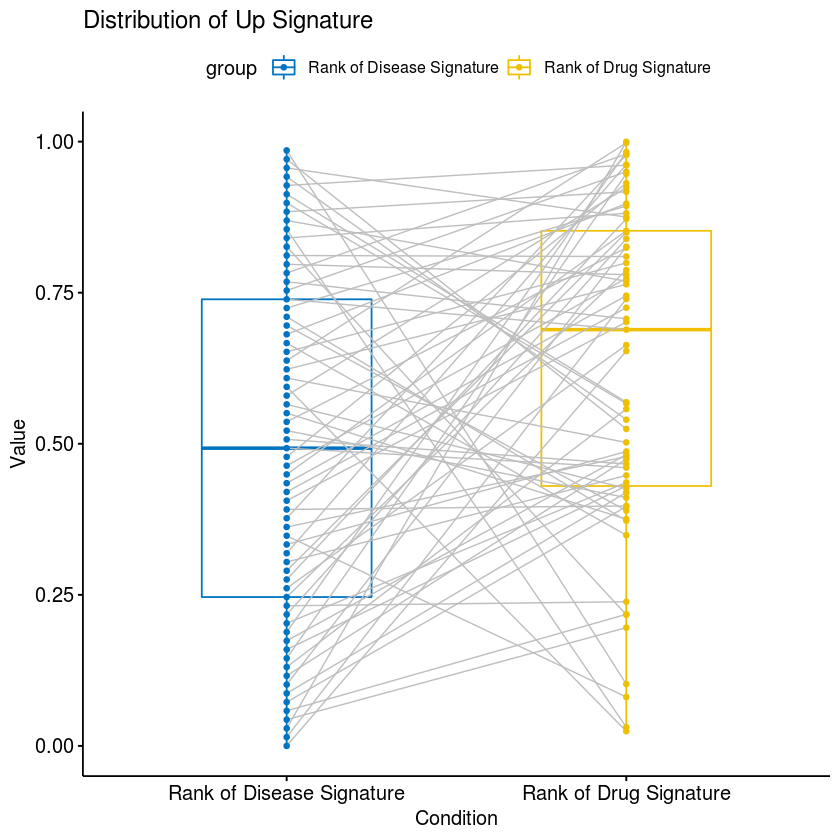

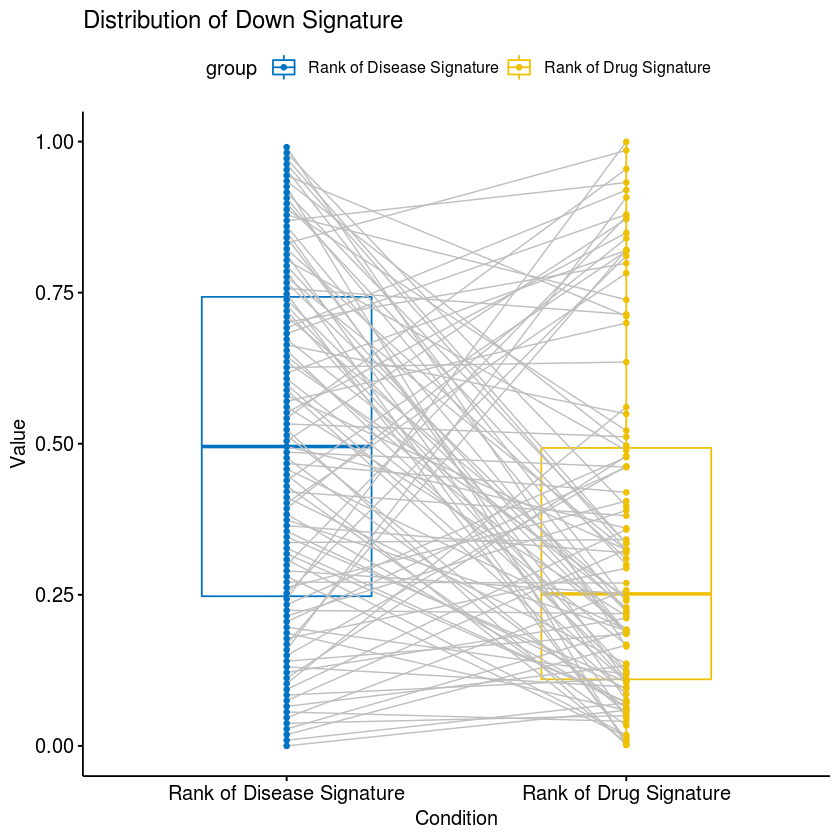

In [15]:
output_list[[idx_top10[1]]]

$up

$down


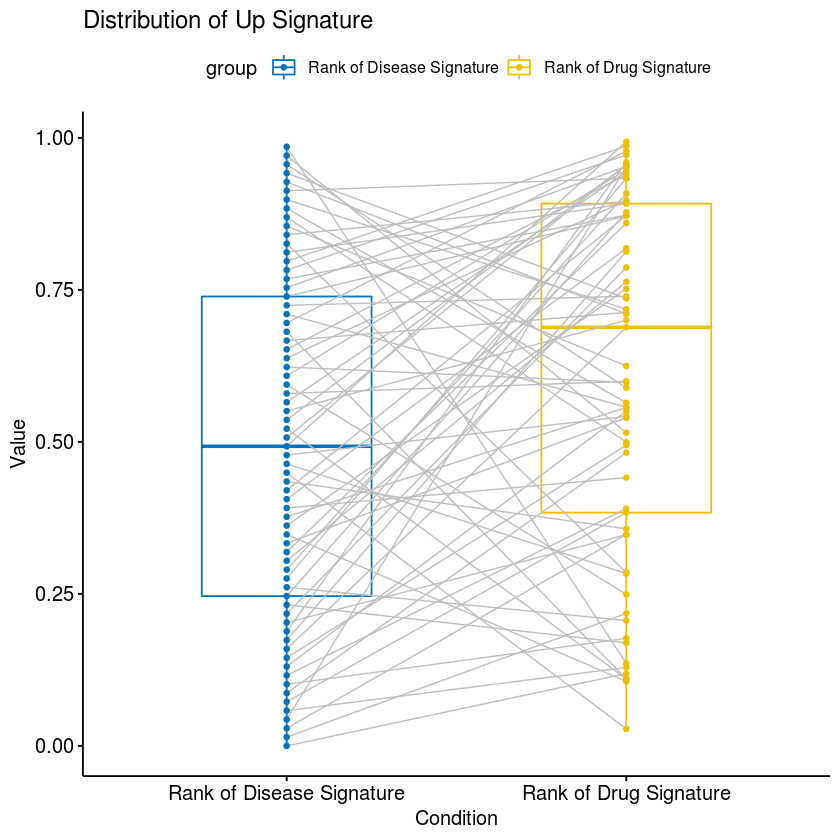

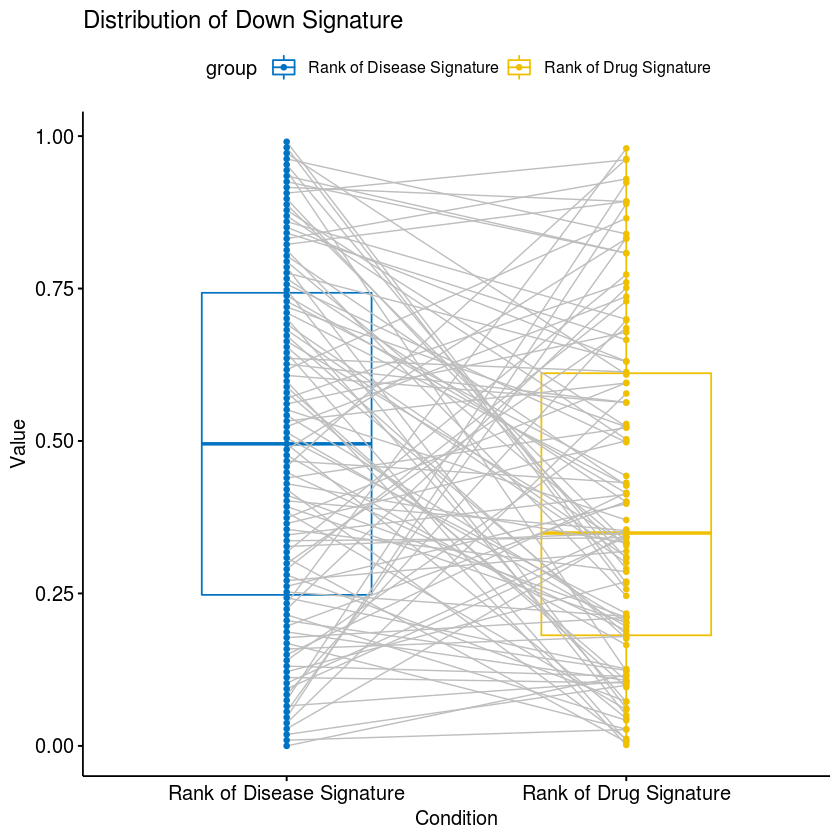

In [16]:
output_list[[idx_top10[2]]]

$up

$down


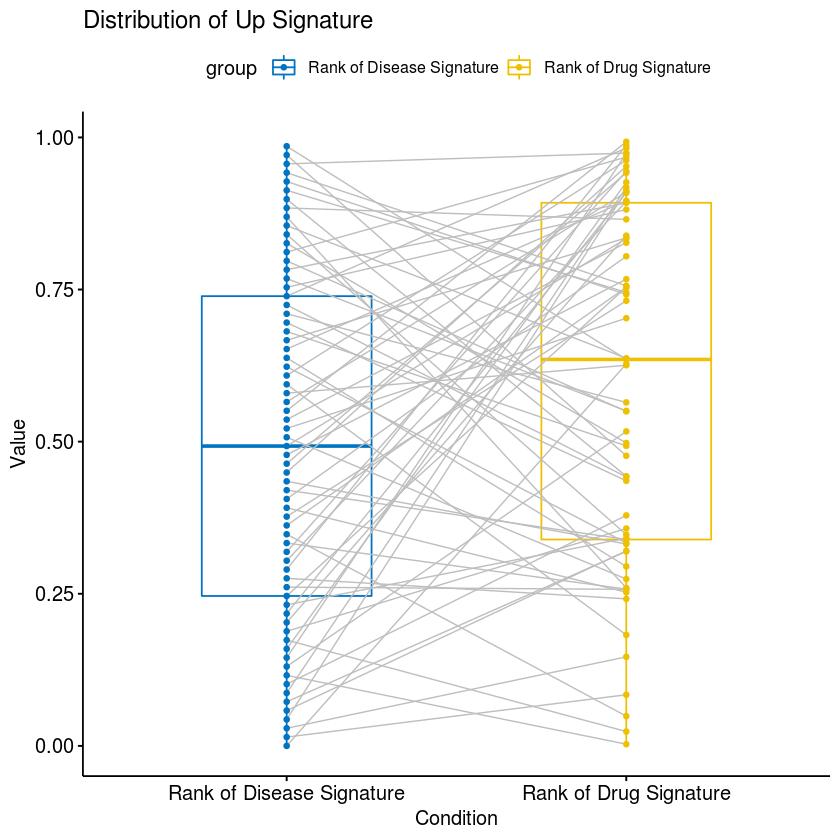

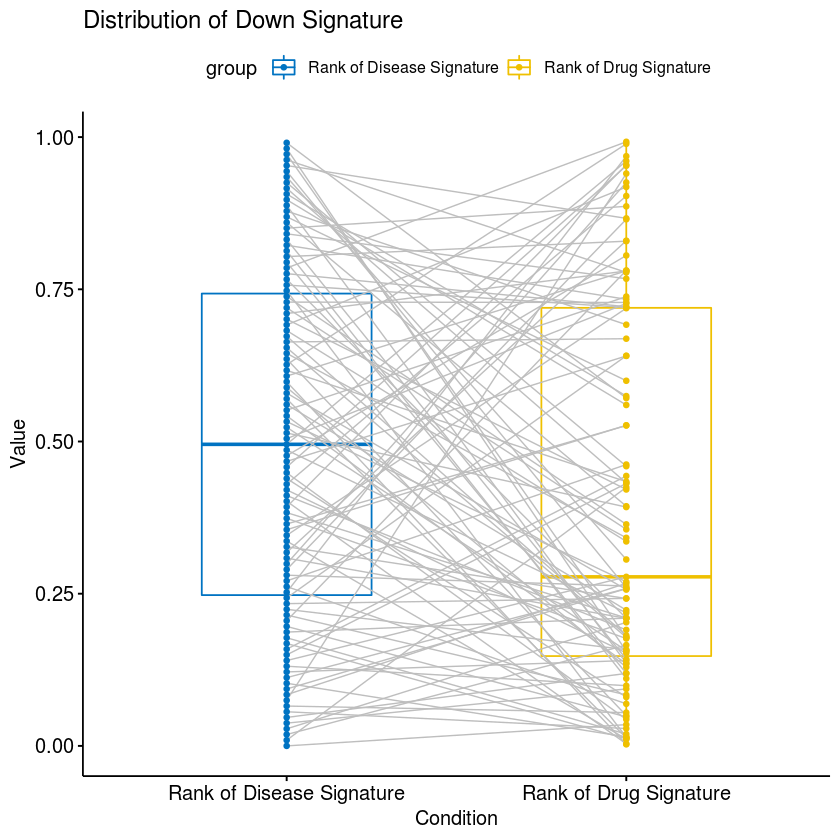

In [17]:
output_list[[idx_top10[3]]]

$up

$down


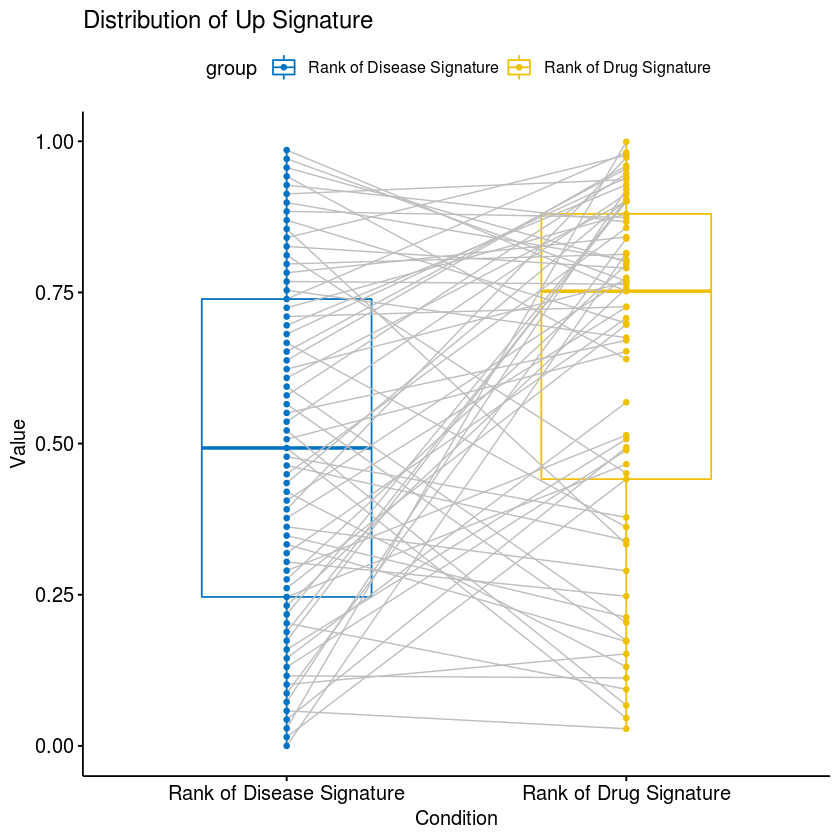

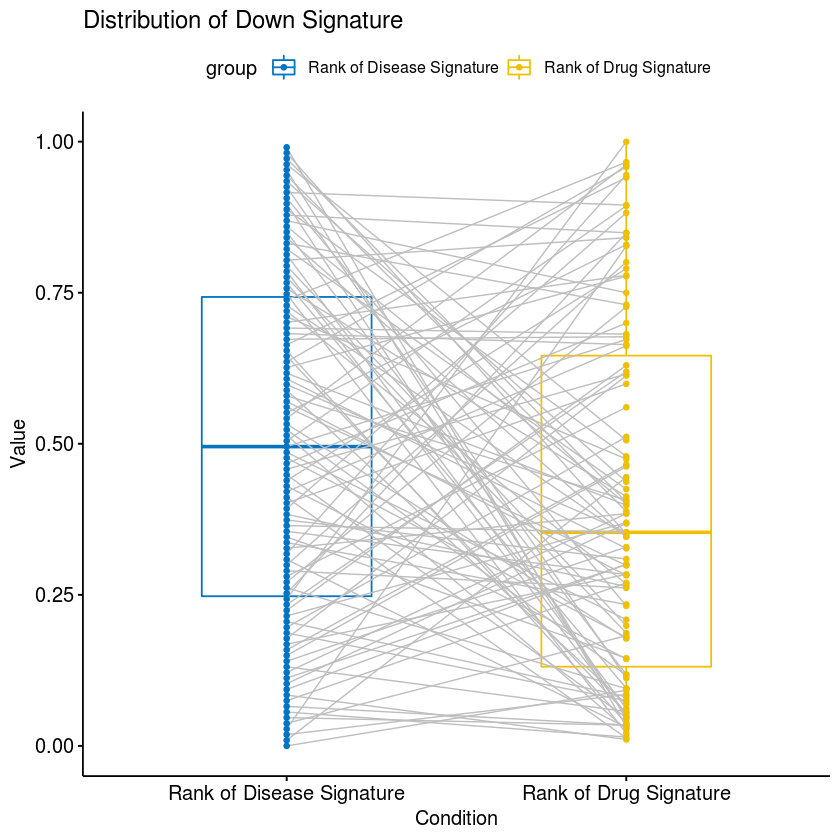

In [18]:
output_list[[idx_top10[4]]]

$up

$down


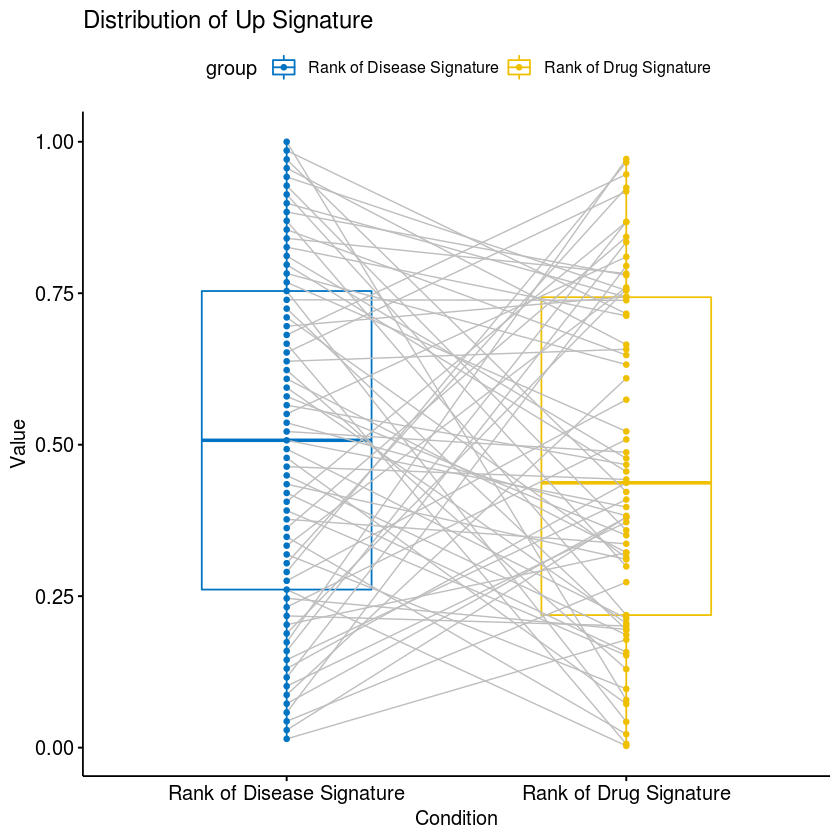

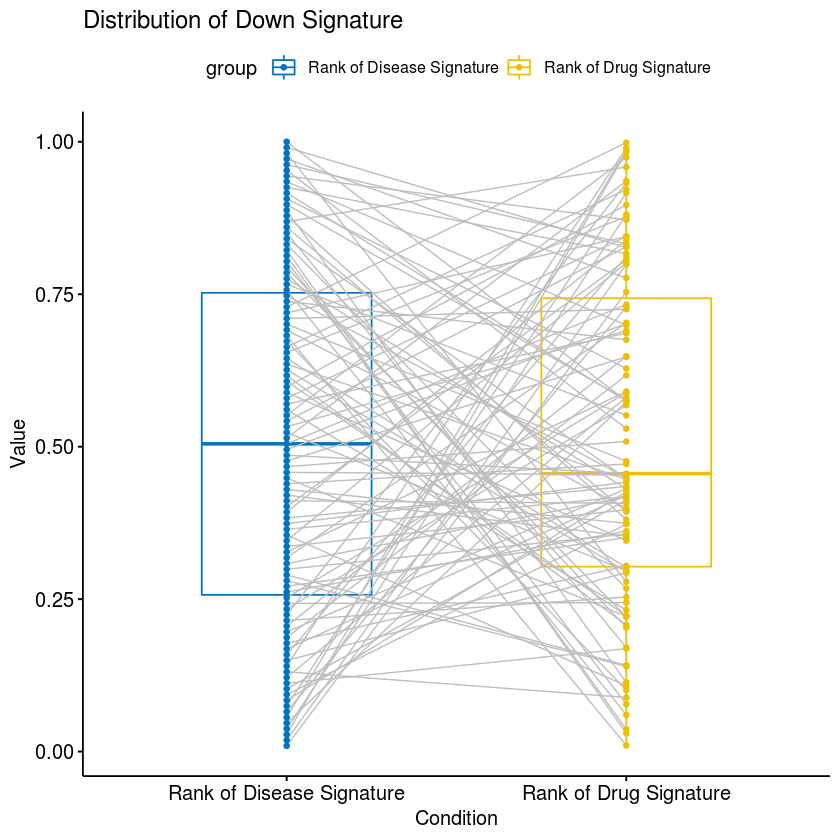

In [71]:
output_list[[1]]

$up

$down


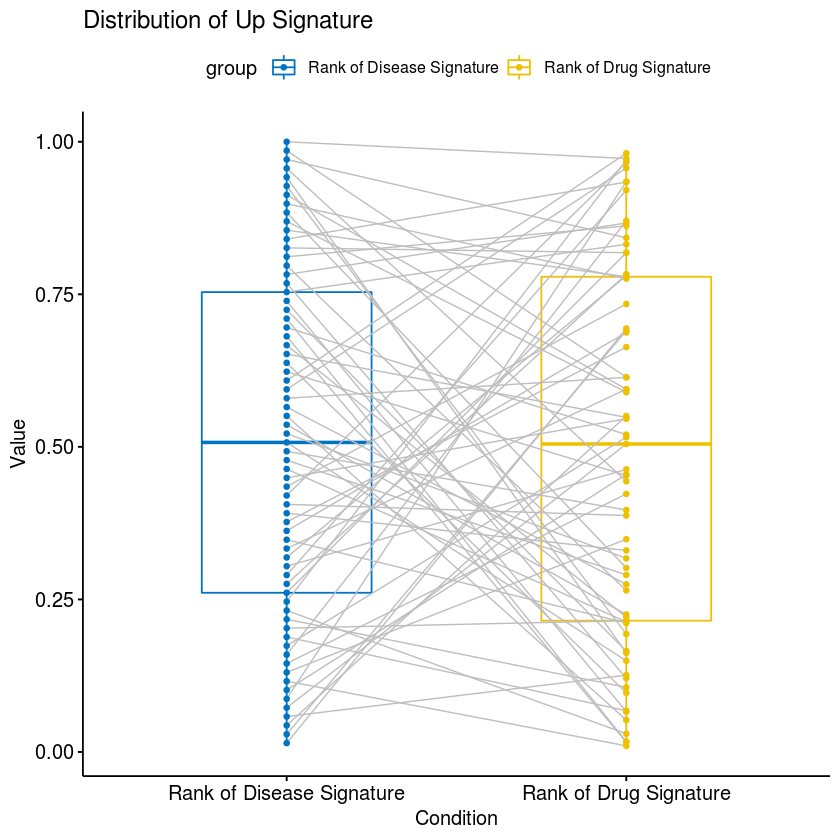

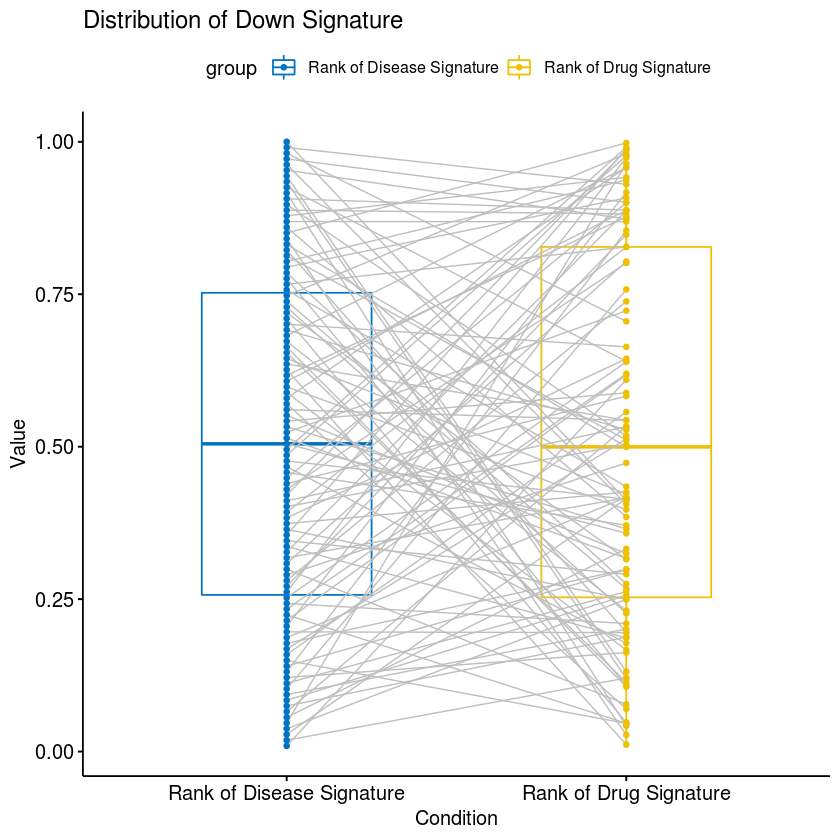

In [75]:
output_list[[2]]

$up

$down


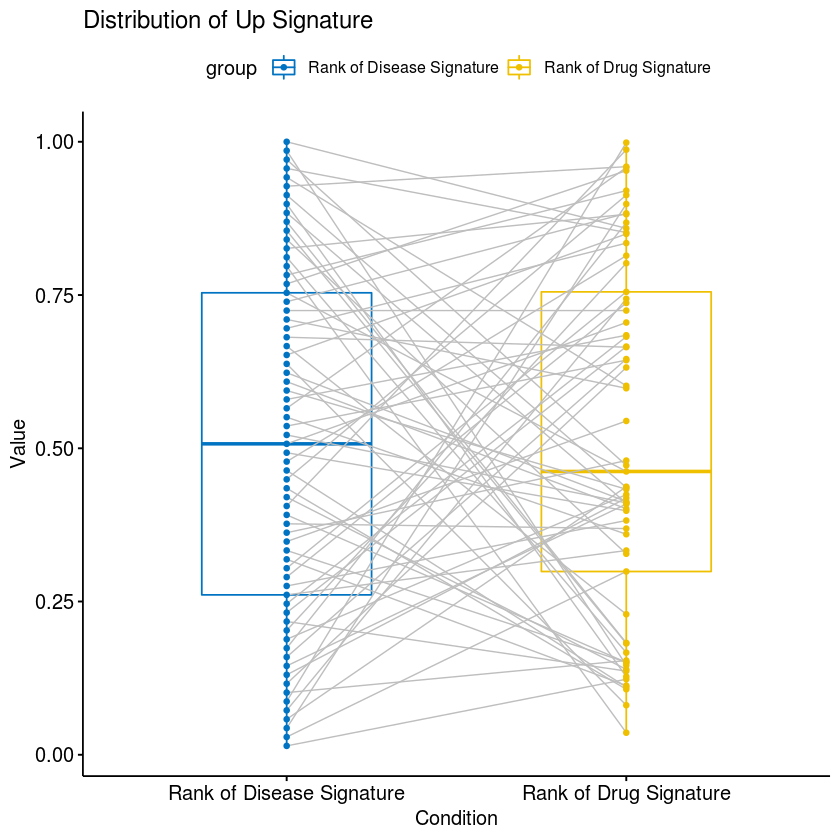

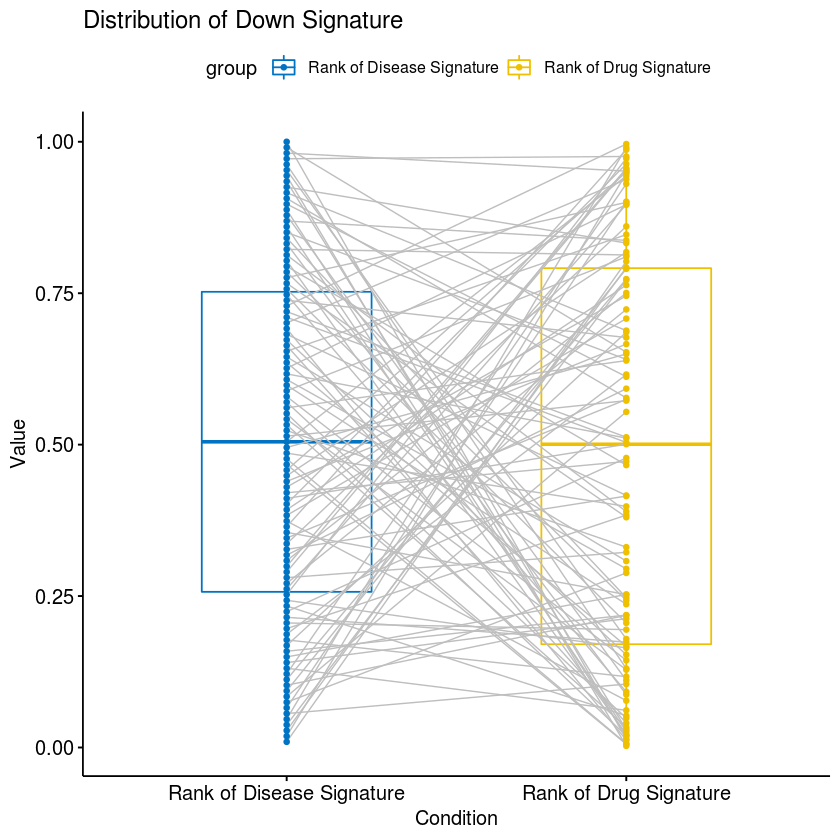

In [76]:
output_list[[11]]

$up

$down


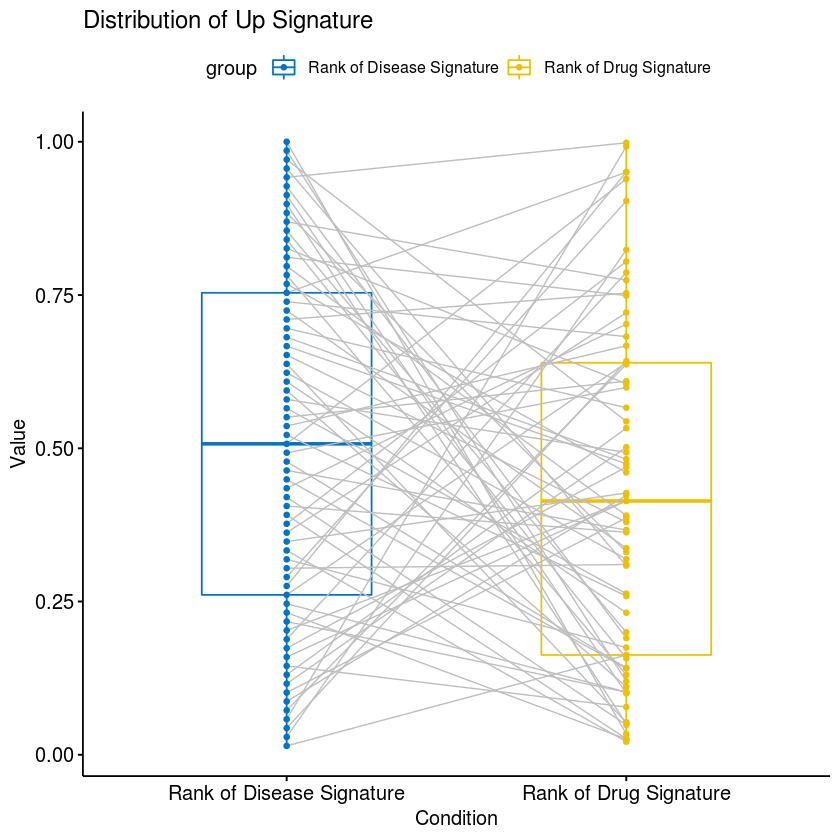

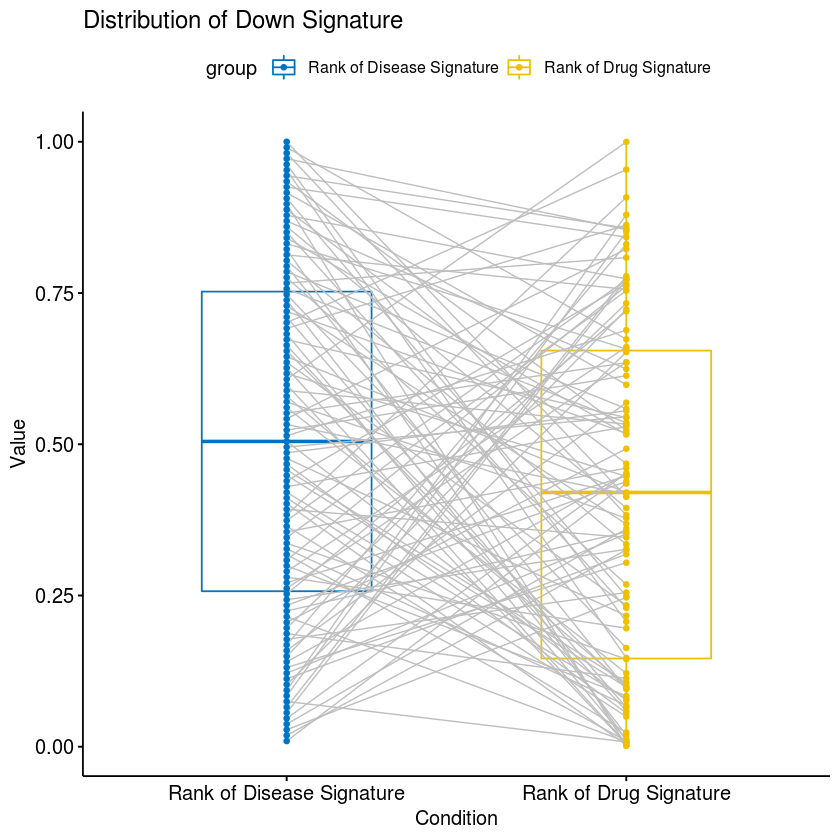

In [77]:
output_list[[19]]

In [82]:
which(compound_name == "atorvastatin")

[1]  684 4602 4603 4866 4867

$up

$down


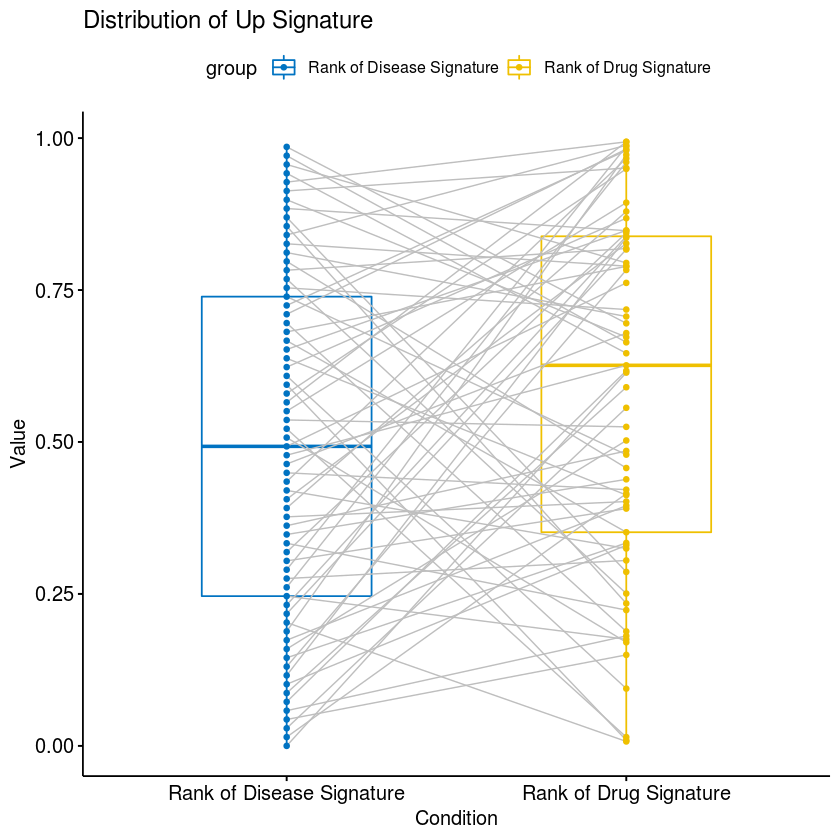

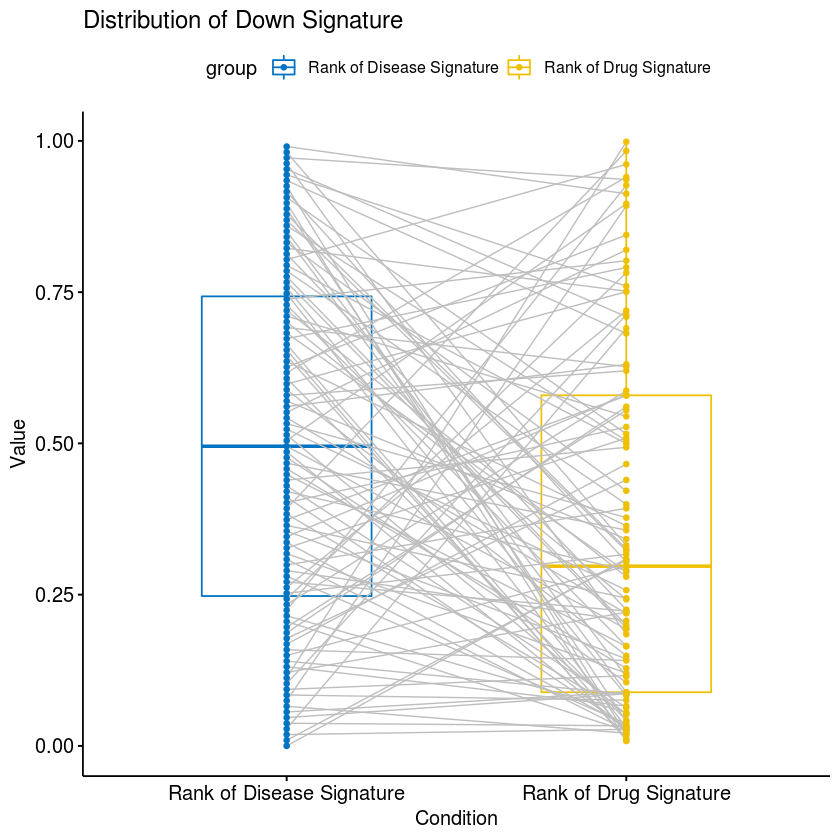

In [93]:
output_list[[684]]

$up

$down


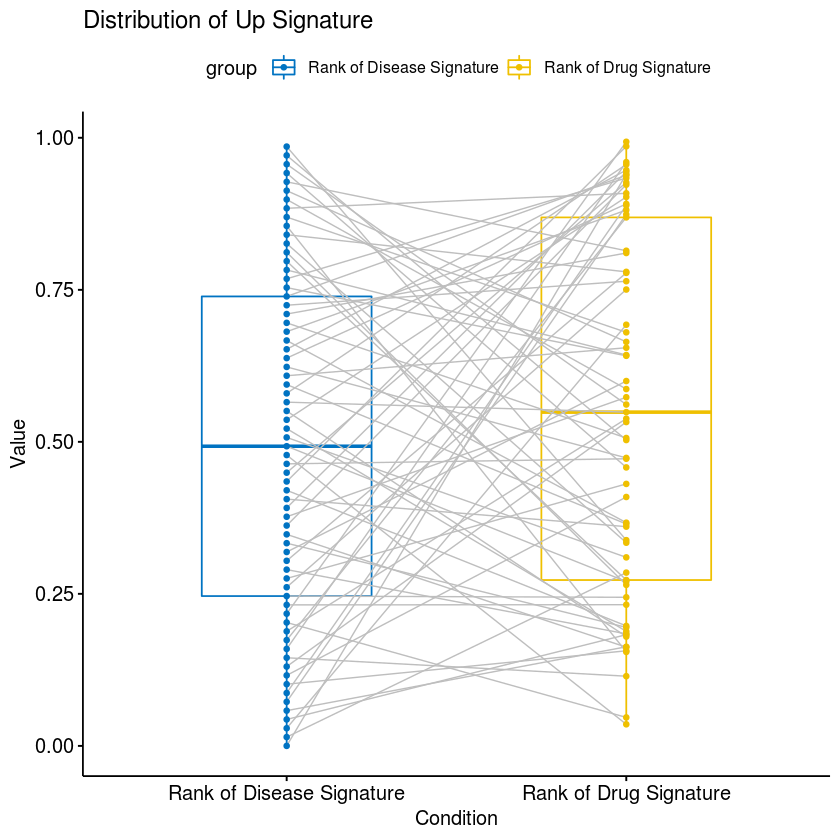

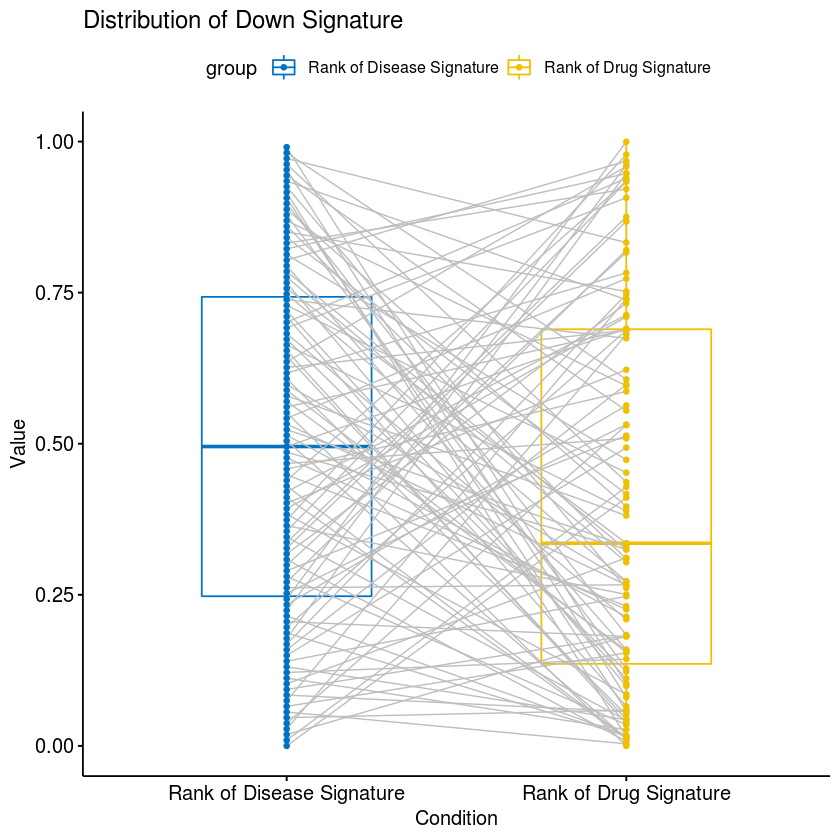

In [94]:
output_list[[4602]]

$up

$down


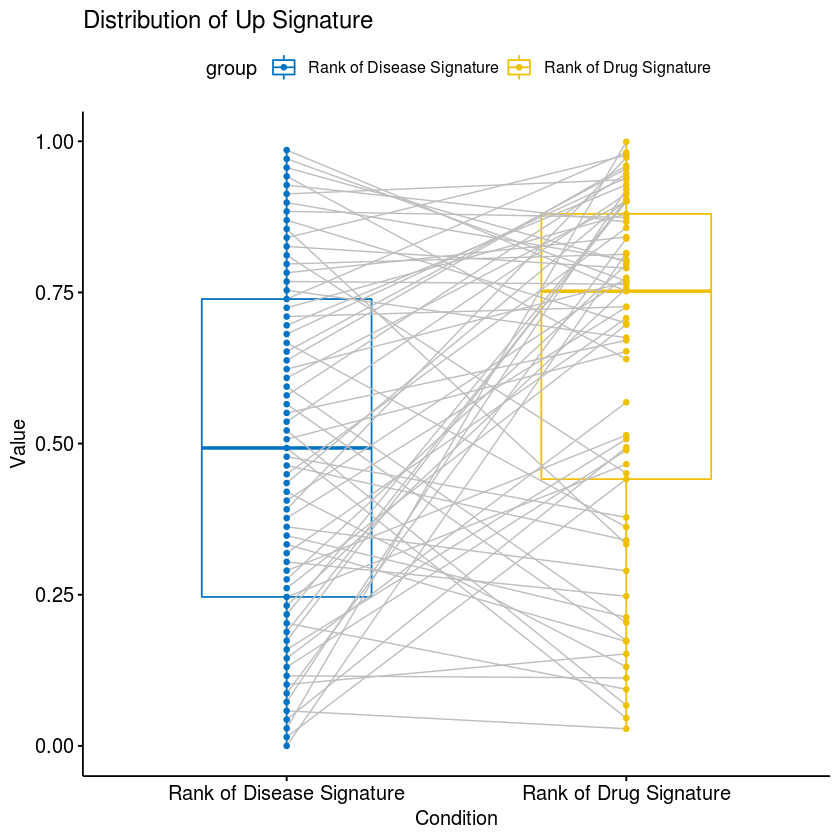

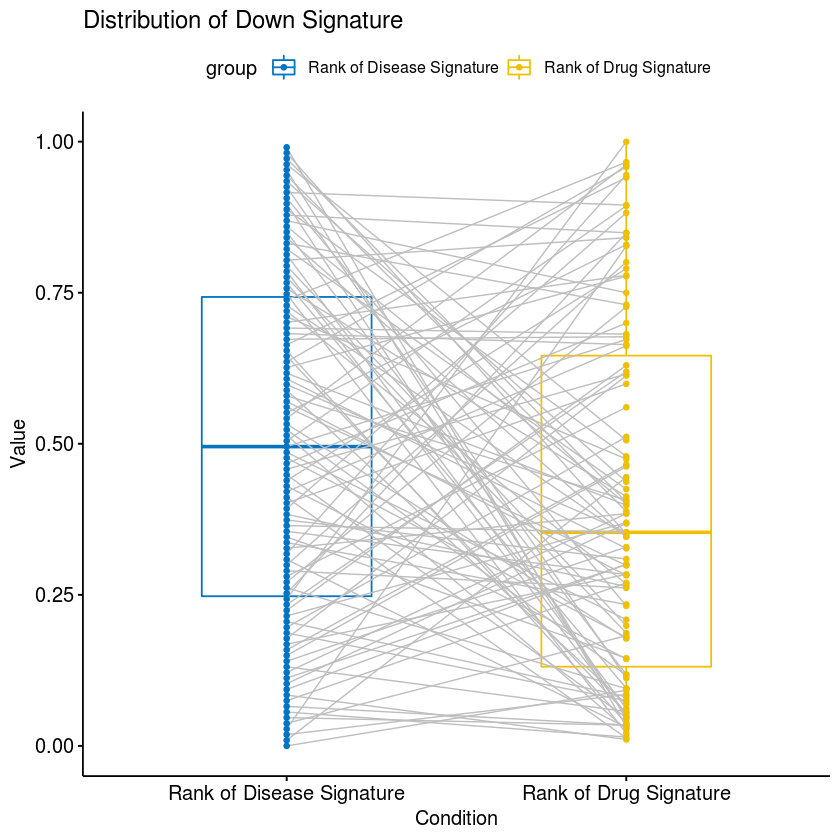

In [96]:
output_list[[4603]]

$up

$down


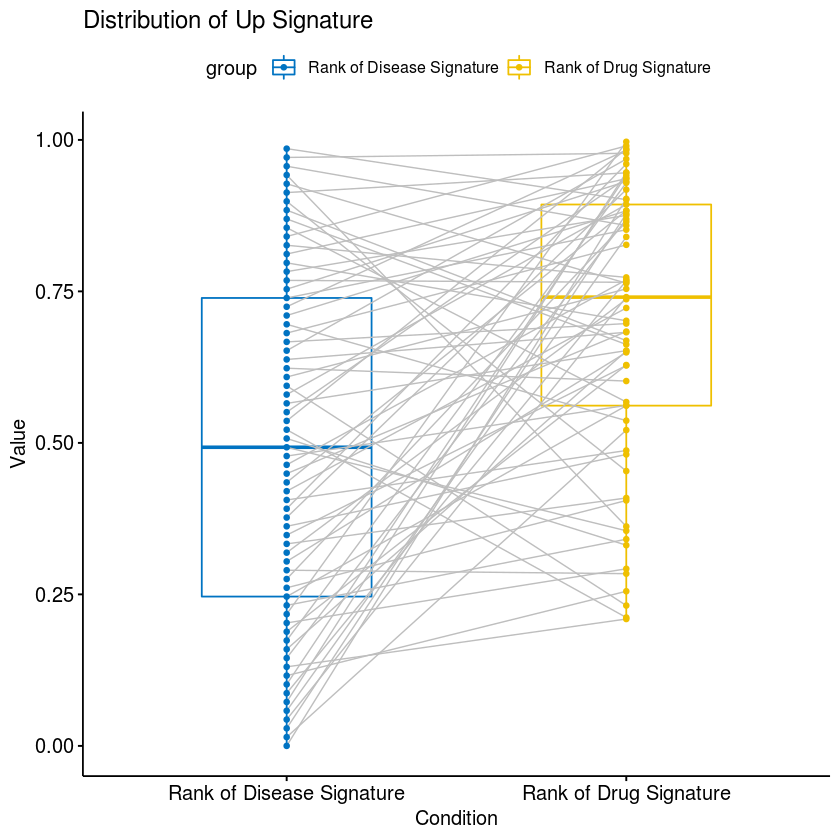

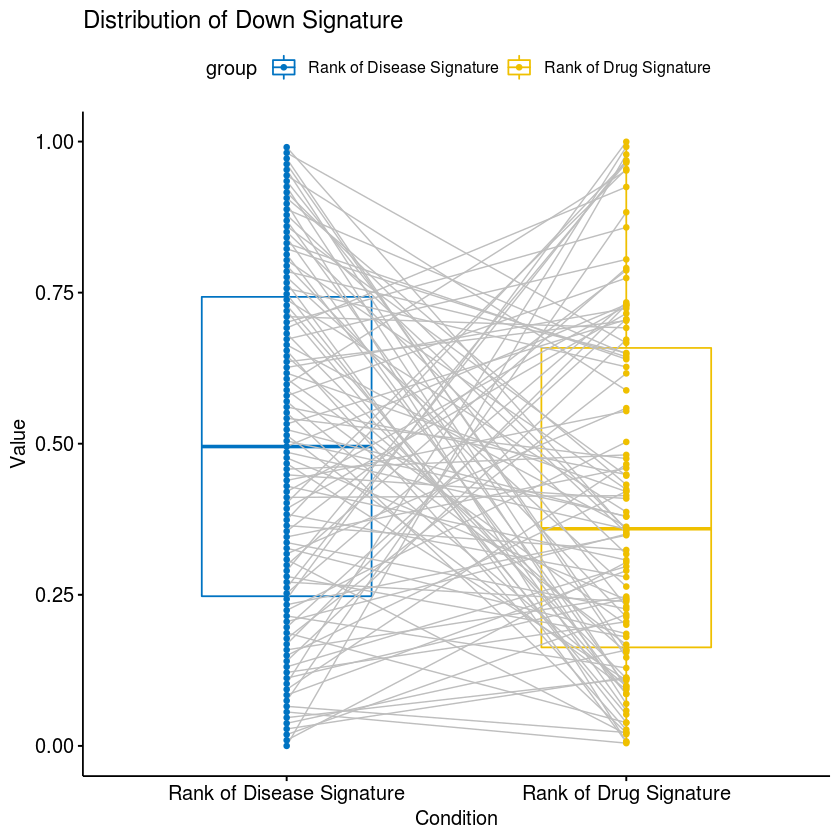

In [97]:
output_list[[4866]]

$up

$down


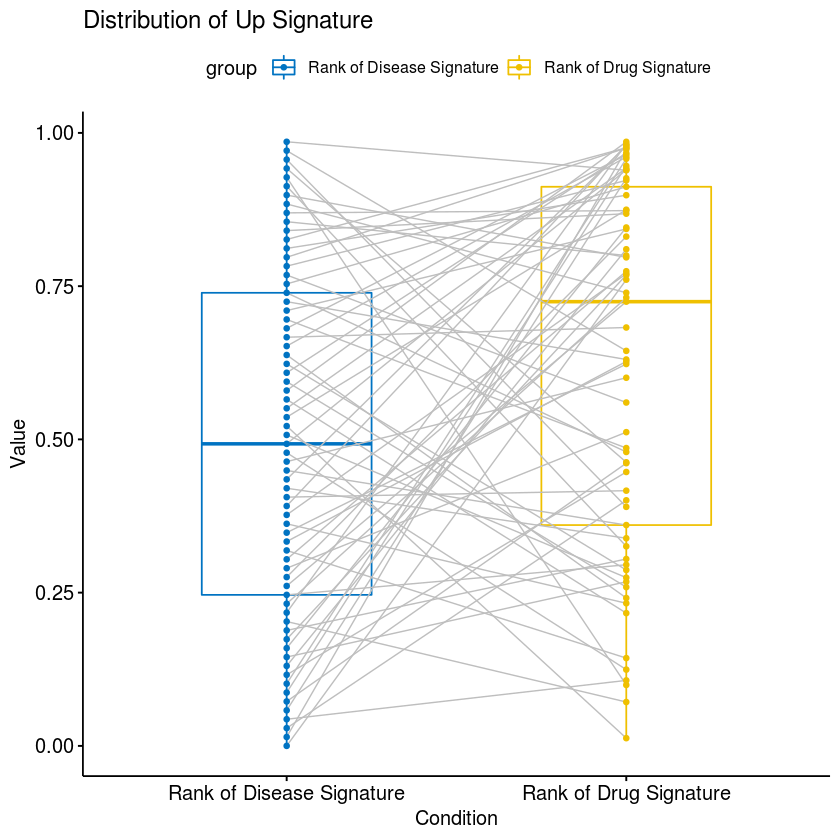

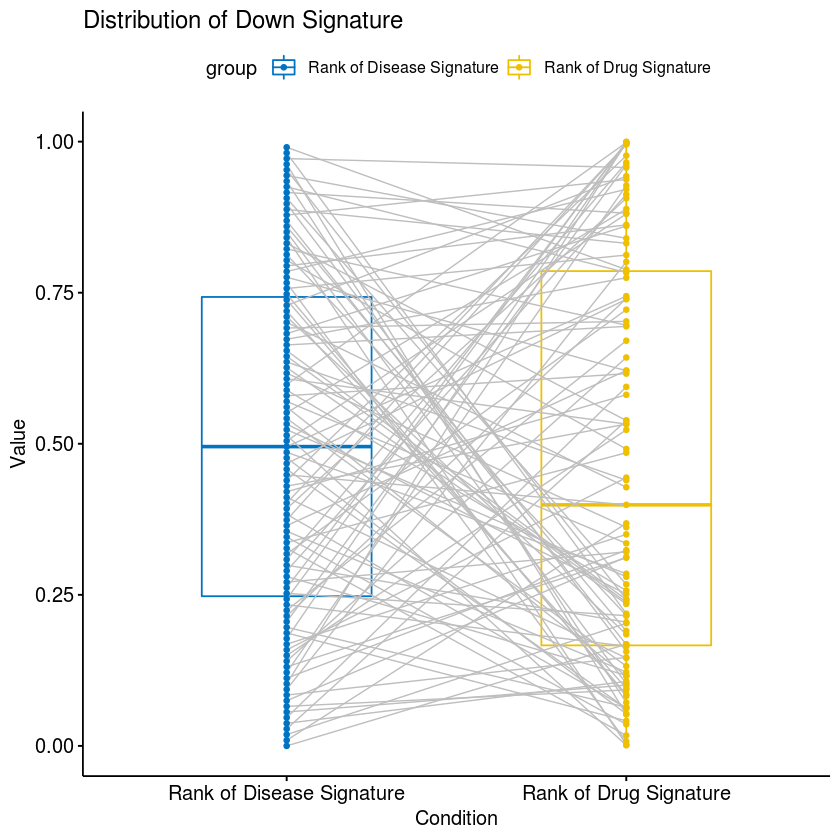

In [98]:
output_list[[4867]]

In [100]:
getwd()

[1] "/gpfs/ysm/project/zhao/zy92/NASH/dr_multiomics/utilities"

### identify the genes that can be reversed 

In [ ]:
# comparison of the ranking bar plot 
# 

In [ ]:
pair_plot_gene <- function(tmp_df, title_str) {
    p <- ggpaired(tmp_df, x = "group", y = "rank_value",
         color = "group", line.color = "gray", line.size = 0.4,
         palette = "jco", title = title_str) 
    #stat_compare_means(paired = TRUE)
    p
}

visualize_enrichment_gene <- function(up_signature, down_signature, gene_rank_matrix, compound_name, idx_vec) {
    # sample a vector
    pert_vec <- gene_rank_matrix[, 1]
    up_signature <- up_signature[up_signature %in% pert_vec]   
    down_signature <- down_signature[down_signature %in% pert_vec]
    p_list <- list()
    # get the matching results for all the drugs in idx_vec
    for (i in 1:ncol(gene_rank_matrix[,idx_vec])) {
        if (i %% 1000 == 0)  { IRdisplay::display_html(paste0("INFO: ", i, " Instances."))}
        pert_vec <- gene_rank_bing[, i]
        # get the rank
        up_v <- match(up_signature, pert_vec)
        down_v <- match(down_signature, pert_vec)
        #print(length(up_v))
        #print(length(down_v))
        plot_df_up <- data.frame(rank_value = c(1-1:length(up_signature)/length(up_signature),1-(up_v/length(pert_vec))),
                                  group = c(rep("Rank of Disease Signature", length(up_signature)), 
                                            rep("Rank of Drug Signature", length(up_signature))))
        plot_df_down <- data.frame(rank_value = c(1-1:length(down_signature)/length(down_signature),1-(down_v/length(pert_vec))),
                                  group = c(rep("Rank of Disease Signature", length(down_signature)), 
                                            rep("Rank of Drug Signature", length(down_signature))))
        p_list[[i]] <- list() 
        p_list[[i]][["up"]] <- pair_plot(plot_df_up, "Distribution of Up Signature ")
        p_list[[i]][["down"]] <- pair_plot(plot_df_down, "Distribution of Down Signature ")
    }
    #output_list <- list(plot_df_up = plot_df_up, plot_df_down = plot_df_down)
    return(p_list)
}

In [17]:
# extract the drug gene that could reverse
gene_extract_topn <- function(up_signature, down_signature, gene_rank_bing, compound_name, topn) {
    pert_vec <- gene_rank_bing[, 1]
    up_signature <- up_signature[up_signature %in% pert_vec]   
    down_signature <- down_signature[down_signature %in% pert_vec]
    n_genes <- nrow(gene_rank_bing)
    p_list <- list()
    for (i in 1:ncol(gene_rank_bing)) {
        if (i %% 500 == 0)  { IRdisplay::display_html(paste0("INFO: ", i, " Instances."))}
        pert_vec <- gene_rank_bing[, i]
        
        # get the rank
        up_v <- match(up_signature, pert_vec)
        #up_geneset <- up_signature[up_v[na.omit(which(up_v < round(n_genes * topn)))]]
        up_geneset <- up_signature[na.omit(which(up_v < round(n_genes * topn)))]
        down_v <- match(down_signature, pert_vec)
        #down_geneset <- down_signature[down_v[na.omit(which(down_v > round(n_genes * (1-topn))))]]
        down_geneset <- down_signature[na.omit(which(down_v > round(n_genes * (1-topn))))]
        p_list[[i]] <- list(up_geneset = up_geneset, down_geneset = down_geneset)
        
    }
    return(p_list)
    
}



In [18]:
geneset_list <- gene_extract_topn(up_signature_df$entrezgene_id, down_signature_df$entrezgene_id, gene_rank_bing, compound_name,0.2)

INFO: 500 Instances.

INFO: 1000 Instances.

INFO: 1500 Instances.

INFO: 2000 Instances.

INFO: 2500 Instances.

INFO: 3000 Instances.

INFO: 3500 Instances.

INFO: 4000 Instances.

INFO: 4500 Instances.

INFO: 5000 Instances.

INFO: 5500 Instances.

In [20]:
source("/ysm-gpfs/project//zy92/NASH/dr_multiomics/code//correlation_connectivity.R")
source("/ysm-gpfs/project//zy92/NASH/dr_multiomics/code/)

In [21]:
correlation_score_df_pearson <- correlation_score_merged(up_signature_df$entrezgene_id, down_signature_df$entrezgene_id, gene_rank_bing, compound_name)
correlation_score_df_spearman <- correlation_score_merged_spearman(up_signature_df$entrezgene_id, down_signature_df$entrezgene_id, gene_rank_bing, compound_name)

[1] "INFO: 500 Instances."
[1] "INFO: 1000 Instances."
[1] "INFO: 1500 Instances."
[1] "INFO: 2000 Instances."
[1] "INFO: 2500 Instances."
[1] "INFO: 3000 Instances."
[1] "INFO: 3500 Instances."
[1] "INFO: 4000 Instances."
[1] "INFO: 4500 Instances."
[1] "INFO: 5000 Instances."
[1] "INFO: 5500 Instances."
[1] "INFO: 500 Instances."
[1] "INFO: 1000 Instances."
[1] "INFO: 1500 Instances."
[1] "INFO: 2000 Instances."
[1] "INFO: 2500 Instances."
[1] "INFO: 3000 Instances."
[1] "INFO: 3500 Instances."
[1] "INFO: 4000 Instances."
[1] "INFO: 4500 Instances."
[1] "INFO: 5000 Instances."
[1] "INFO: 5500 Instances."


In [22]:
head(correlation_score_df_pearson)

compound_name    connectivity_score
1 rutin             0.03910984       
2 tyrphostin-AG-82  0.07585924       
3 AG-957           -0.08645286       
4 alaproclate      -0.01000406       
5 albendazole      -0.21212860       
6 alclometasone     0.04958601

In [23]:
head(correlation_score_df_spearman)

compound_name    connectivity_score
1 rutin             0.046828087      
2 tyrphostin-AG-82  0.074899846      
3 AG-957           -0.091606868      
4 alaproclate      -0.009399076      
5 albendazole      -0.207294739      
6 alclometasone     0.034323134

In [19]:
geneset_list[[1]]

$up_geneset
 [1]   3485  23541  29763    191     36   5091   9110  23498   4054 116987
[11]  11059  26235   6641   3069

$down_geneset
 [1] 29117 50999 54505  9550 10519 55802 64343  5782 64769  2222   378 10092
[13]  6993  3956    39 55281  3429  8407  5320  9235 50940  7057 10468  3627